# Fase 4: Visualización de Datos

In [17]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sys.path.append('../')

from src import support_dataframes as sup_df
import pandas as pd
pd.set_option('display.max_columns', False)

In [18]:
dfs_concatenados = pd.read_csv('../datos/tratados/dfs_concatenados.csv')
dfs_concatenados.drop(columns=['Unnamed: 0'], inplace=True)
dfs_concatenados.head()

,codigo_orgao_superior,nome_orgao_superior,codigo_orgao,nome_orgao,codigo_unidade_gestora,nome_unidade_gestora,categoria_economica,origem_receita,especie_receita,detalhamento,valor_previsto_atualizado,valor_lancado,valor_realizado,percentual_realizado,data_lancamento,ano_exercicio,diferencia,anio,mes,diferencia_absoluta
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.0,0.0,1297.13,"0,00",2013-12-31,2013,-1297.13,2013.0,12.0,1297.13
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,0.0,0.0,26666621.42,"0,00",2013-12-31,2013,-26666621.42,2013.0,12.0,26666621.42
2,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",OUTRAS MULTAS E JUROS DE MORA,0.0,0.0,301251.13,"0,00",2013-12-31,2013,-301251.13,2013.0,12.0,301251.13
3,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIV.ATIVA POR INFRAÇÃO ADMINISTRATIVA,0.0,0.0,1855.58,"0,00",2013-12-31,2013,-1855.58,2013.0,12.0,1855.58
4,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",OUTRAS RESTITUICOES,0.0,0.0,52140.68,"0,00",2013-12-31,2013,-52140.68,2013.0,12.0,52140.68


## 1. Gráficos de Barras y Líneas:

### Crear gráficos que muestren la comparación entre ingresos previstos, lanzados y realizados para cada categoría.

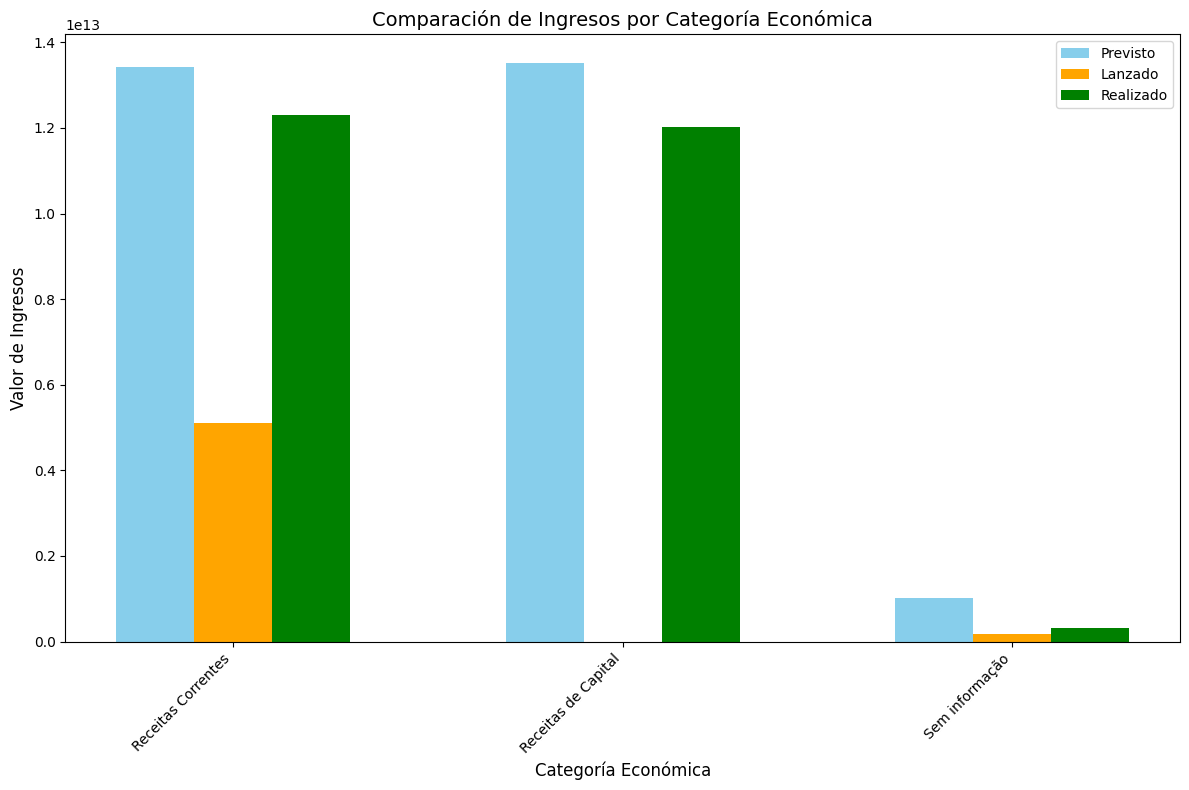

In [19]:
ingresos_por_categoria = dfs_concatenados.groupby('categoria_economica').agg({
    'valor_previsto_atualizado': 'sum',
    'valor_lancado': 'sum',
    'valor_realizado': 'sum'
})

plt.figure(figsize=(12, 8))

categorias = ingresos_por_categoria.index
ind = np.arange(len(categorias))

ancho_barras = 0.2

plt.bar(ind - ancho_barras, ingresos_por_categoria['valor_previsto_atualizado'], width=ancho_barras, label='Previsto', color='skyblue')
plt.bar(ind, ingresos_por_categoria['valor_lancado'], width=ancho_barras, label='Lanzado', color='orange')
plt.bar(ind + ancho_barras, ingresos_por_categoria['valor_realizado'], width=ancho_barras, label='Realizado', color='green')

plt.title('Comparación de Ingresos por Categoría Económica', fontsize=14)
plt.xlabel('Categoría Económica', fontsize=12)
plt.ylabel('Valor de Ingresos', fontsize=12)
plt.xticks(ind, categorias, rotation=45, ha="right")
plt.legend()

plt.tight_layout()
plt.show()


### Graficar la Evolución Temporal de los Ingresos Realizados y Previstos

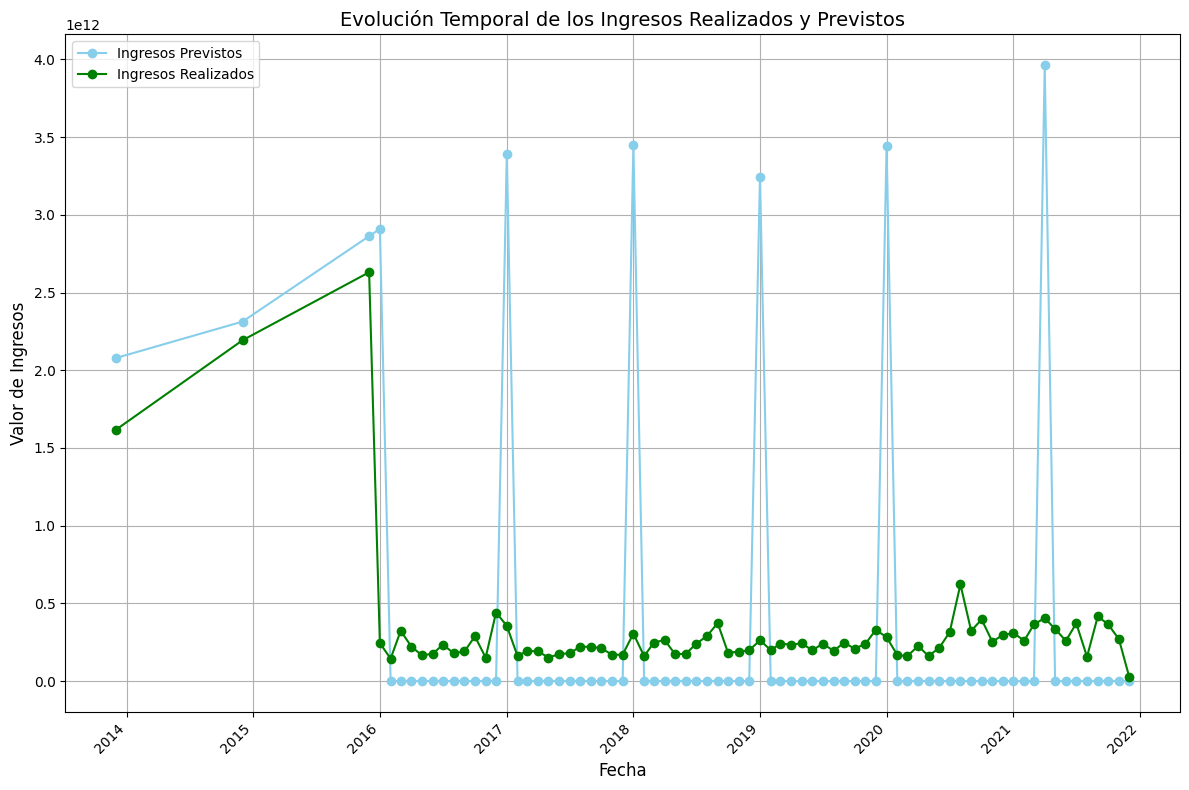

In [20]:
dfs_concatenados['data_lancamento'] = pd.to_datetime(dfs_concatenados['data_lancamento'], format='%Y-%m-%d', errors='coerce')

dfs_concatenados['anio_mes'] = dfs_concatenados['data_lancamento'].dt.to_period('M')  # Crear una columna con anio y mes (formato YYYY-MM)

ingresos_temporales = dfs_concatenados.groupby('anio_mes').agg({
    'valor_previsto_atualizado': 'sum',
    'valor_realizado': 'sum'
}).reset_index()

ingresos_temporales['fecha'] = ingresos_temporales['anio_mes'].dt.to_timestamp()

plt.figure(figsize=(12, 8))

plt.plot(ingresos_temporales['fecha'], ingresos_temporales['valor_previsto_atualizado'], marker='o', label='Ingresos Previstos', color='skyblue')

plt.plot(ingresos_temporales['fecha'], ingresos_temporales['valor_realizado'], marker='o', label='Ingresos Realizados', color='green')

plt.title('Evolución Temporal de los Ingresos Realizados y Previstos', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor de Ingresos', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend()

plt.tight_layout()
plt.grid(True)
plt.show()


In [21]:
dfs_concatenados.head()

,codigo_orgao_superior,nome_orgao_superior,codigo_orgao,nome_orgao,codigo_unidade_gestora,nome_unidade_gestora,categoria_economica,origem_receita,especie_receita,detalhamento,valor_previsto_atualizado,valor_lancado,valor_realizado,percentual_realizado,data_lancamento,ano_exercicio,diferencia,anio,mes,diferencia_absoluta,anio_mes
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.0,0.0,1297.13,"0,00",2013-12-31,2013,-1297.13,2013.0,12.0,1297.13,2013-12
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,0.0,0.0,26666621.42,"0,00",2013-12-31,2013,-26666621.42,2013.0,12.0,26666621.42,2013-12
2,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",OUTRAS MULTAS E JUROS DE MORA,0.0,0.0,301251.13,"0,00",2013-12-31,2013,-301251.13,2013.0,12.0,301251.13,2013-12
3,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIV.ATIVA POR INFRAÇÃO ADMINISTRATIVA,0.0,0.0,1855.58,"0,00",2013-12-31,2013,-1855.58,2013.0,12.0,1855.58,2013-12
4,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",OUTRAS RESTITUICOES,0.0,0.0,52140.68,"0,00",2013-12-31,2013,-52140.68,2013.0,12.0,52140.68,2013-12


## 2. Diagramas de Caja:

### Evaluar la dispersión de las diferencias entre los valores previstos y realizados en diferentes categorías.

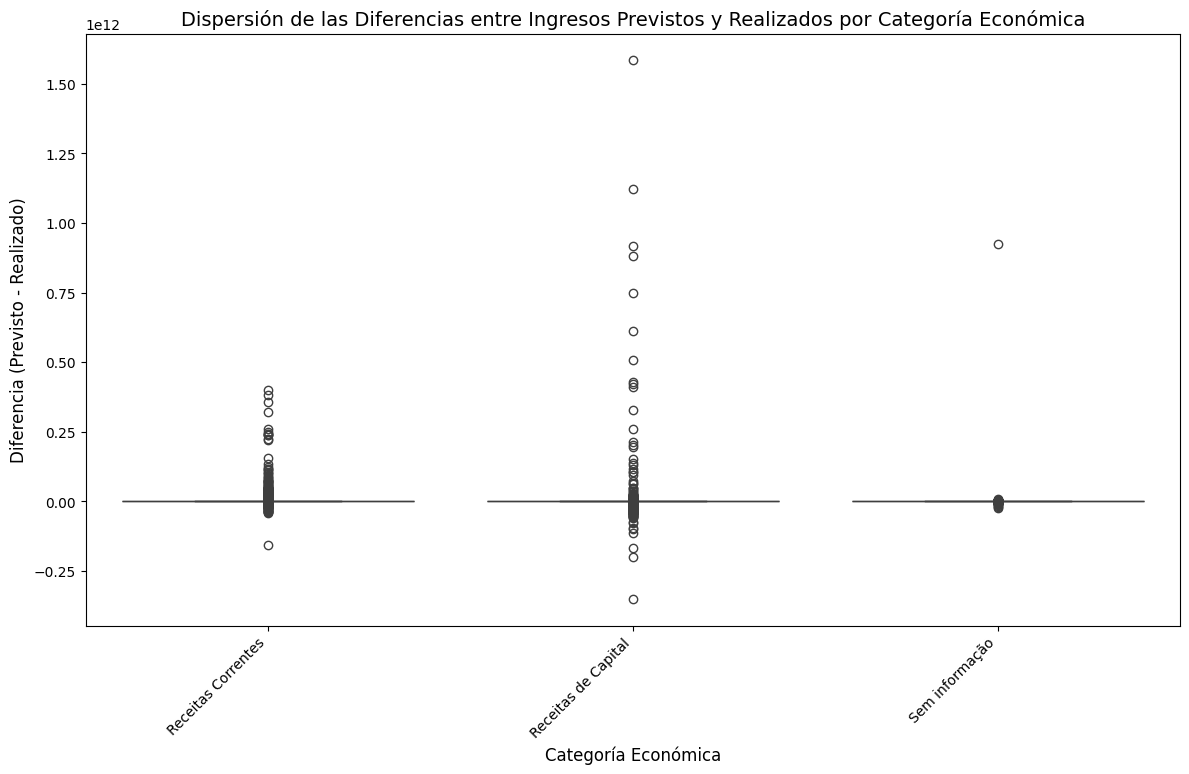

In [22]:
dfs_concatenados['diferencia'] = dfs_concatenados['valor_previsto_atualizado'] - dfs_concatenados['valor_realizado']

plt.figure(figsize=(12, 8))
sns.boxplot(x='categoria_economica', y='diferencia', data=dfs_concatenados)

plt.title('Dispersión de las Diferencias entre Ingresos Previstos y Realizados por Categoría Económica', fontsize=14)
plt.xlabel('Categoría Económica', fontsize=12)
plt.ylabel('Diferencia (Previsto - Realizado)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
